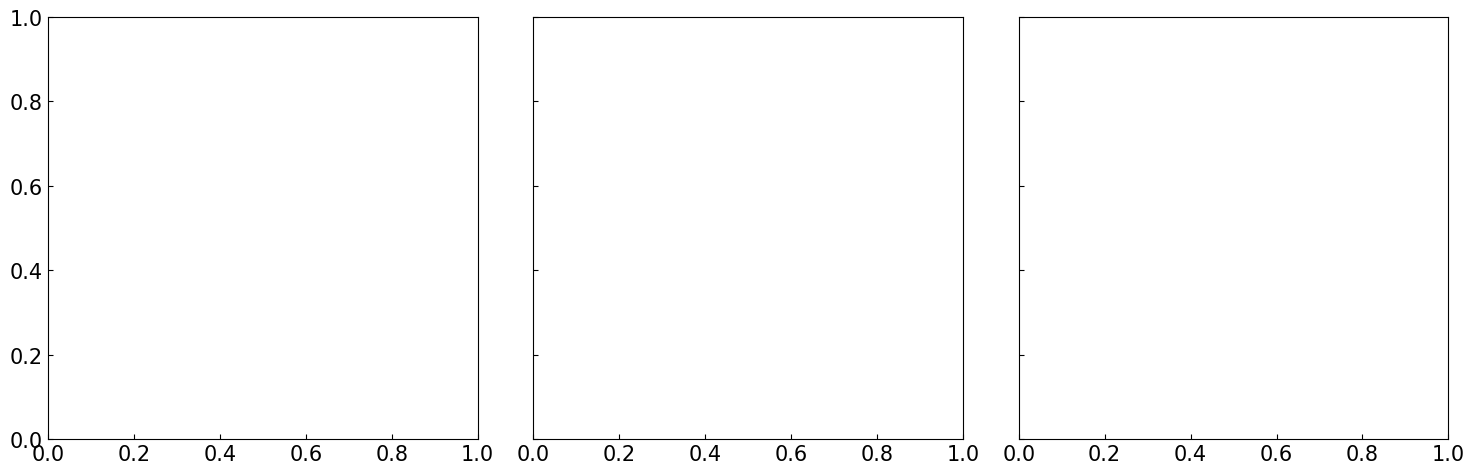

In [1]:
import sys
import matplotlib.pyplot as plt
from tqdm import tqdm

sys.path.append("../src/")

from fLe_timecrystal import fle
import plot_utils as pu
from plot import *

plt.style.use("plot_style.mplstyle")
data_path = "../_raw/time_crystal/"
colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]
fig, ax = plt.subplots(1,3, figsize=(15, 5), sharex = True, sharey = True);
avg = 4000
task_set = ["001", "002", "003", "004"]

alpha = [0.01, 0.03, 0.05, 0.07, 0.09, 0.1]

In [2]:
def resize_names(ax, size = 10):
    ax.xaxis.label.set_size(size)
    ax.yaxis.label.set_size(size)   
    ax.tick_params(axis = 'both', which = 'major', labelsize = size)
    
def add_axislabel_ins(axins, axi, x_text = "Freq. "+ r"$(1/t)$", y_text = "Amp."):
    props = dict(facecolor='white', edgecolor='white')
    axins.text(0.13, 0.65, x_text, transform=axi.transAxes, bbox=props, fontsize = 10)
    axins.text(0.04, 0.76, y_text, transform=axi.transAxes, bbox=props, fontsize = 10, rotation = 90)

In [3]:
axi = ax[0]
axins = axi.inset_axes([0.6, 0.08, 0.37, 0.37])
axins_ = axi.inset_axes([0.1, 0.7, 0.27, 0.27])

T = 100
h = 0.05
v0 = 1.0
M = 1.0
eta_1 = 0.0
eta_2 = 1.0
T1 = 0.0
T2 = 1.0

linear = 0
for i, a in enumerate(tqdm(alpha)):
    eq = fle(a, linear)
    eq.params(T = T, h = h,
              v0 = v0, M = M,
              eta_1 = eta_1, eta_2 = eta_2,
              T1 = T1, T2 = T2)
    plot_msd(eq = eq, avg = avg, task_set = task_set, data_path = data_path, 
             ax = axi, color_fd = colors[9 - i], legend_main = True)
    plot_msd(eq = eq, avg = avg, task_set = task_set, data_path = data_path, 
             ax = axins, color_fd = colors[9 - i], legend_main = False, truncate = 25)
    
    df_ft = get_ft(eq, avg, task_set, data_path)
    plot_fft(axins_, df_ft, half = True)
    df_freq = get_freq(df_ft)
    
add_1_npi(axins_, n = 1)
add_1_npi(axins_, n = 2)
resize_names(axins)
resize_names(axins_)
add_axislabel_ins(axins_, axi)

add_trend(axi, x0 = h, xf = 100, func = t, text = "~t", xtext = 0.1)
add_trend(axi, x0 = h, xf = 1, func = t2, text = "~t²", xtext = 0.1)
add_trend(axi, x0 = h, xf = 1, func = t3, text = "~t³", xtext = 0.1)
add_perio_grid(axins, 1/np.pi, 25, times = 2)

axi.set_xscale("log")
axi.set_yscale("log")
axins_.set_xscale("log")
axins_.set_yscale("log")

axi.set_ylabel("MSD " r"$\langle x^2 (t) \rangle$")
axi.set_xlabel("Time "+"$t$")
axi.set_xlim(xmin = h, xmax = 100)
axi.set_title("Time crystal")
axins.set_xlabel("")


handles, labels = axi.get_legend_handles_labels()
axi.get_legend().remove()

pu.add_caption_letter(axi, "(a)")

  0%|          | 0/6 [00:00<?, ?it/s]

Computing analytical....
No analytical solution


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Computing analytical....
No analytical solution


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
 17%|█▋        | 1/6 [00:03<00:17,  3.59s/it]

Computing analytical....
No analytical solution


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Computing analytical....
No analytical solution


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
 33%|███▎      | 2/6 [00:07<00:14,  3.63s/it]

Computing analytical....
No analytical solution


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Computing analytical....
No analytical solution


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
 50%|█████     | 3/6 [00:10<00:10,  3.63s/it]

Computing analytical....
No analytical solution


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Computing analytical....
No analytical solution


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
 67%|██████▋   | 4/6 [00:14<00:07,  3.62s/it]

Computing analytical....
No analytical solution


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Computing analytical....
No analytical solution


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
 83%|████████▎ | 5/6 [00:18<00:03,  3.63s/it]

Computing analytical....
No analytical solution


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Computing analytical....
No analytical solution


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
100%|██████████| 6/6 [00:21<00:00,  3.65s/it]


In [4]:
axi = ax[1]
axins = axi.inset_axes([0.6, 0.08, 0.37, 0.37])
axins_ = axi.inset_axes([0.1, 0.7, 0.27, 0.27])

T = 100
h = 0.05
v0 = 1.0
M = 1.0
eta_1 = 1.0
eta_2 = 0.0
T1 = 1.0
T2 = 0.0

linear = 0
for i, a in enumerate(tqdm(alpha)):
    eq = fle(a, linear)
    eq.params(T = T, h = h,
              v0 = v0, M = M,
              eta_1 = eta_1, eta_2 = eta_2,
              T1 = T1, T2 = T2)
    plot_msd(eq = eq, avg = avg, task_set = task_set, data_path = data_path, 
             ax = axi, color_fd = colors[9 - i])
    plot_msd(eq = eq, avg = avg, task_set = task_set, data_path = data_path, 
             ax = axins, color_fd = colors[9 - i], legend_main = False, truncate = 25)
    
    df_ft = get_ft(eq, avg, task_set, data_path)
    plot_fft(axins_, df_ft, half = True)
    df_freq = get_freq(df_ft)
    
add_1_npi(axins_, n = 1)
resize_names(axins)
resize_names(axins_)
add_axislabel_ins(axins_, axi)

add_trend(axi, x0 = h, xf = 100, func = t, text = "~t", xtext = 0.1)
add_trend(axi, x0 = h, xf = 1, func = t2, text = "~t²", xtext = 0.1)
add_trend(axi, x0 = h, xf = 1, func = t3, text = "~t³", xtext = 0.1)
add_perio_grid(axins, 1/np.pi, 25, times = 2)

axi.set_xscale("log")
axi.set_yscale("log")
axins_.set_xscale("log")
axins_.set_yscale("log")

axi.set_ylabel("MSD " r"$\langle x^2 (t) \rangle$")
axi.set_xlabel("Time "+"$t$")
axi.set_xlim(xmin = h, xmax = 100)
axi.set_title("Time glass")
axins.set_xlabel("")

pu.add_caption_letter(axi, "(b)")

  0%|          | 0/6 [00:00<?, ?it/s]No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Computing analytical....
No analytical solution


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Computing analytical....
No analytical solution


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
 17%|█▋        | 1/6 [00:03<00:19,  3.82s/it]No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Computing analytical....
No analytical solution


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Computing analytical....
No analytical solution


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
 33%|███▎      | 2/6 [00:07<00:14,  3.70s/it]No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Computing analytical....
No analytical solution


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Computing analytical....
No analytical solution


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
 50%|█████     | 3/6 [00:11<00:11,  3.69s/it]No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Computing analytical....
No analytical solution


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Computing analytical....
No analytical solution


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
 67%|██████▋   | 4/6 [00:14<00:07,  3.67s/it]No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Computing analytical....
No analytical solution


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Computing analytical....
No analytical solution


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
 83%|████████▎ | 5/6 [00:18<00:03,  3.62s/it]No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Computing analytical....
No analytical solution


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Computing analytical....
No analytical solution


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
100%|██████████| 6/6 [00:21<00:00,  3.65s/it]


In [5]:
axi = ax[2]
axins = axi.inset_axes([0.6, 0.08, 0.37, 0.37])
axins_ = axi.inset_axes([0.1, 0.7, 0.27, 0.27])

T = 100
h = 0.05
v0 = 1.0
M = 1.0
eta_1 = 1.0
eta_2 = 1.0
T1 = 1.0
T2 = 1.0

linear = 0
for i, a in enumerate(tqdm(alpha)):
    eq = fle(a, linear)
    eq.params(T = T, h = h,
              v0 = v0, M = M,
              eta_1 = eta_1, eta_2 = eta_2,
              T1 = T1, T2 = T2)
    plot_msd(eq = eq, avg = avg, task_set = task_set, data_path = data_path, 
             ax = axi, color_fd = colors[9 - i])
    plot_msd(eq = eq, avg = avg, task_set = task_set, data_path = data_path, 
             ax = axins, color_fd = colors[9 - i], legend_main = False, truncate = 25)
    
    df_ft = get_ft(eq, avg, task_set, data_path)
    plot_fft(axins_, df_ft, half = True)
    df_freq = get_freq(df_ft)
    
add_1_npi(axins_, n = 1)
add_1_npi(axins_, n = 2)
resize_names(axins)
resize_names(axins_)
add_axislabel_ins(axins_, axi)

add_trend(axi, x0 = h, xf = 100, func = t, text = "~t", xtext = 0.1)
add_trend(axi, x0 = h, xf = 1, func = t2, text = "~t²", xtext = 0.1)
add_trend(axi, x0 = h, xf = 1, func = t3, text = "~t³", xtext = 0.1)
add_perio_grid(axins, 1/np.pi, 25, times = 2)

axi.set_xscale("log")
axi.set_yscale("log")
axins_.set_xscale("log")
axins_.set_yscale("log")

axi.set_ylabel("MSD " r"$\langle x^2 (t) \rangle$")
axi.set_xlabel("Time "+"$t$")
axi.set_xlim(xmin = h, xmax = 100)
axi.set_title("Time crystal + time glass")
axins.set_xlabel("")

pu.add_caption_letter(axi, "(c)")

  0%|          | 0/6 [00:00<?, ?it/s]No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Computing analytical....
No analytical solution


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Computing analytical....
No analytical solution


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
 17%|█▋        | 1/6 [00:03<00:19,  3.84s/it]No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Computing analytical....
No analytical solution


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Computing analytical....
No analytical solution


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
 33%|███▎      | 2/6 [00:07<00:15,  3.79s/it]No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Computing analytical....
No analytical solution


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Computing analytical....
No analytical solution


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
 50%|█████     | 3/6 [00:11<00:11,  3.70s/it]No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Computing analytical....
No analytical solution


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Computing analytical....
No analytical solution


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
 67%|██████▋   | 4/6 [00:15<00:07,  3.76s/it]No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Computing analytical....
No analytical solution


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Computing analytical....
No analytical solution


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
 83%|████████▎ | 5/6 [00:18<00:03,  3.76s/it]No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Computing analytical....
No analytical solution


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Computing analytical....
No analytical solution


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
100%|██████████| 6/6 [00:22<00:00,  3.74s/it]


In [6]:
fig.legend(handles, labels, bbox_to_anchor = (0.9, 1.1), ncol = 7)
fig.tight_layout()

In [7]:
axins_.get_xticks

<bound method _AxesBase.get_xticks of <Axes: label='inset_axes'>>

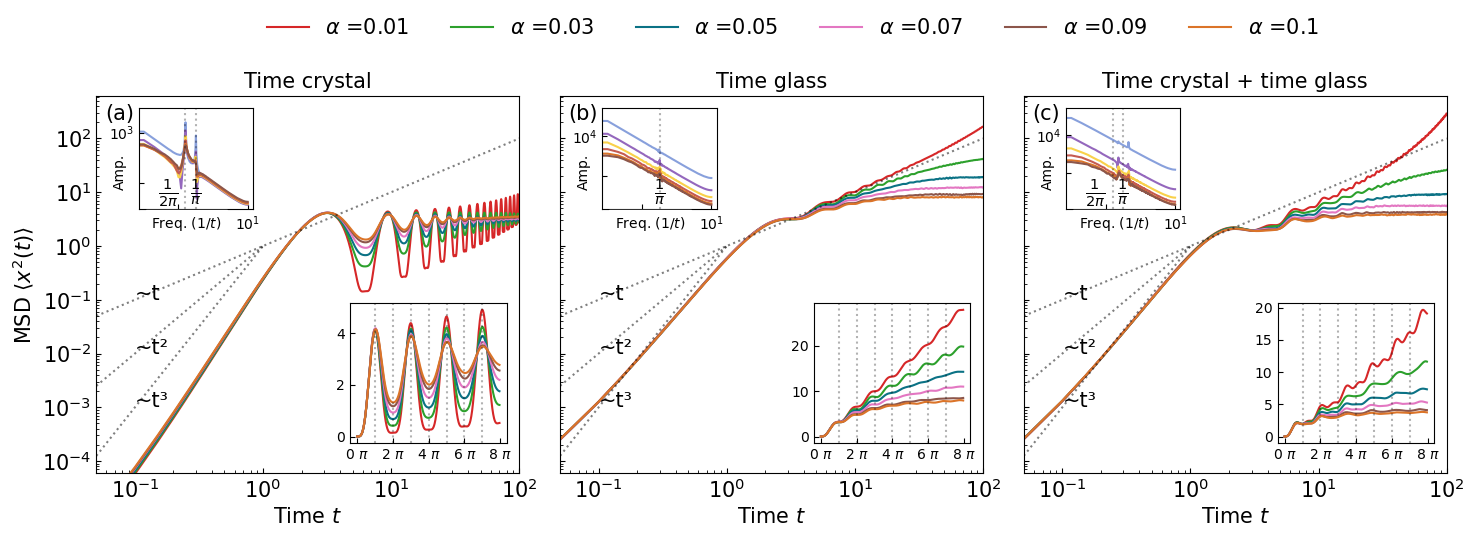

In [8]:
fig

In [9]:
fig.savefig("../outs/fig2.png", dpi = 200)
fig.savefig("../outs/fig2_500dpi.png", dpi = 500)
fig.savefig("../outs/fig2_1000dpi.png", dpi = 1000)